# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as tsa
from pandas.plotting import lag_plot

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


#### No misssing data ####

How many rows and columns are in our data?

In [5]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
ts_index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=1751)

Assign the time series index to the dataframe's index.

In [7]:
sensor.index = pd.DatetimeIndex(ts_index, freq='infer')
sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [8]:
user_acceleration = sensor[['userAcceleration.x']]
user_acceleration_sd = seasonal_decompose(user_acceleration, model="additive", period=60)

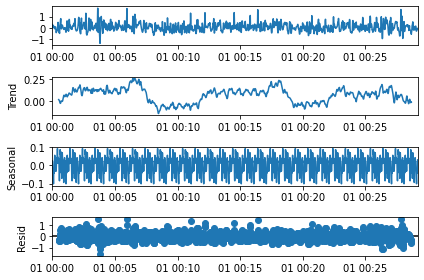

In [9]:
user_acceleration_sd.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [10]:
rotation_rate = sensor[['rotationRate.x']]
rotation_rate_sd = seasonal_decompose(rotation_rate, model="additive", period=60)

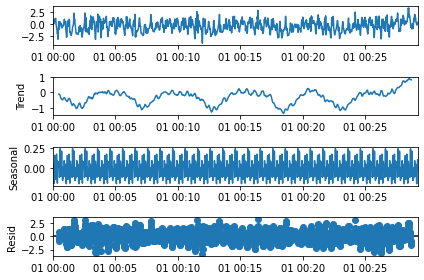

In [11]:
rotation_rate_sd.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

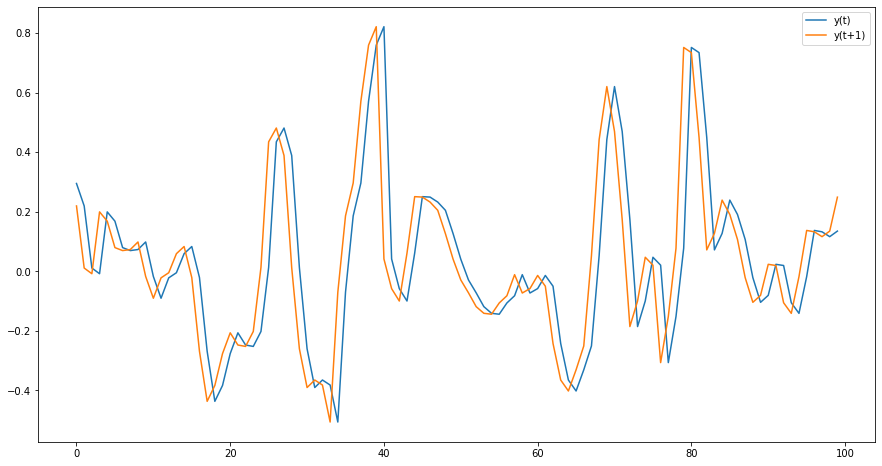

In [12]:
plt.figure(figsize = (15,8))
data_t = user_acceleration[:-1]
data_t_plus_1 = user_acceleration[1:]
plt.plot(data_t[:100].values, label="y(t)")
plt.plot(data_t_plus_1[:100].values, label="y(t+1)")
plt.legend();

Text(0.5, 1.0, 'rotationRate.x')

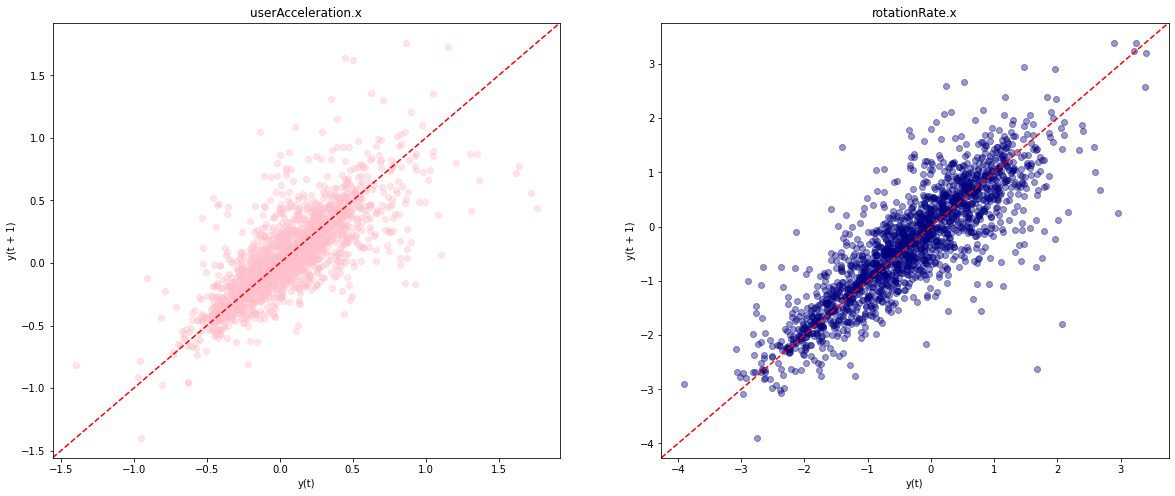

In [13]:
f, ax = plt.subplots(1, 2, figsize = (20,8))

# userAcceleration.x
plt.sca(ax[0])
lag_plot(user_acceleration,c = "pink", alpha=0.4)
plt.plot([0, 1], [0, 1], ls="--", c="r", transform=plt.gca().transAxes);
plt.title('userAcceleration.x')

# rotationRate.x
plt.sca(ax[1])
lag_plot(rotation_rate, c = "navy", alpha=0.4)
plt.plot([0, 1], [0, 1], ls="--", c="red", transform=plt.gca().transAxes)
plt.title('rotationRate.x')


What are your conclusions from both visualizations?

#### Lagplot helps us to check if there is a correlation between this period and the previous period. If there was to be complete and strong correlation, all the plots would be lying in the red line. However, in our sample, we can see that, although the plots are near the line, they are still around it and have a positive correlation ####

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [14]:
# userAcceleration.x

result = adfuller(user_acceleration)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.957994
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [15]:
# rotationRate.x

result = adfuller(rotation_rate)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.269861
p-value: 0.000006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


What are your conclusions from this test?

#### userAcceleration.x ####

adf < the critical values and p-value < 0.05, we reject the null hypothesis H0. It is stationary

#### rotationRate.x ####

adf < less than the critical values p-value < 0.05, we reject the null hypothesis H0. It is stationary


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [20]:
model = ARIMA(user_acceleration, order=(2,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

# test = sensor["rotationRate.x"][-10:]
# train = sensor["rotationRate.x"][:-10]

                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 207.553
Date:                Thu, 16 Sep 2021   AIC                           -409.106
Time:                        18:07:25   BIC                           -392.703
Sample:                    01-01-2018   HQIC                          -403.042
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4039      0.014     28.581      0.000       0.376       0.432
ar.L2         -0.3207      0.017    -18.739      0.000      -0.354      -0.287
sigma2         0.0462      0.001     51.710      0.0

## UNFINISHED ##

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [ ]:
# Your code here:

